### En este notebook haremos una evaluación del funcionamiento del modelo de ensemble

In [2]:
from ensemble_functions import *

Cargamos el ensemble y sus datos:

In [5]:
ensemble_completo = load('..\Entrenamiento\ensemble_1_complete.joblib')

Veamos la estructura del ensemble:

In [7]:
ensemble_completo.keys()

dict_keys(['ensemble', 'ensemble_predictions', 'ensemble_errors', 'ponderacion'])

Veamos cual fué la ponderación elegida:

In [18]:
ensemble_completo['ponderacion']

{'tipo': 'lineal', 'alpha': 1}

In [22]:
print('Errores RMSE de los modelos individuales: ')
print('------------------------------')
distritos = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
for district in distritos:
    print('DISTRITO: ', district.upper())
    print('LSTM: ', ensemble_completo['ensemble']['errors']['lstm'][district])
    print('RF: ', ensemble_completo['ensemble']['errors']['rf'][district]['RMSE'])
    print('XGboost: ', ensemble_completo['ensemble']['errors']['xgb'][district]['RMSE'])
    print('LightGBM: ', ensemble_completo['ensemble']['errors']['lgbm'][district]['RMSE'])
    print('------------------------------')


Errores RMSE de los modelos individuales: 
------------------------------
DISTRITO:  BRONX
LSTM:  340.5677192858899
RF:  322.5181632969083
XGboost:  272.94807605763305
LightGBM:  274.4201237897801
------------------------------
DISTRITO:  BROOKLYN
LSTM:  917.3949618868984
RF:  735.7777706862355
XGboost:  710.2256695576884
LightGBM:  673.1465984832224
------------------------------
DISTRITO:  MANHATTAN
LSTM:  2564.361634455092
RF:  1420.814886784879
XGboost:  1445.479204318016
LightGBM:  1359.992405649711
------------------------------
DISTRITO:  QUEENS
LSTM:  591.1799927300443
RF:  520.82347996801
XGboost:  495.52152514144706
LightGBM:  558.6488663840627
------------------------------
DISTRITO:  STATEN ISLAND
LSTM:  54.67604707493718
RF:  52.044649154814785
XGboost:  50.989536739681725
LightGBM:  54.33653311654604
------------------------------


Los errores del ensemble corresponden a otros datos de testeo:

In [25]:
print('Errores RMSE de los modelos individuales: ')
print('------------------------------')
distritos = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
for district in distritos:
    print('DISTRITO: ', district.upper())
    print('RMSE: ', ensemble_completo['ensemble_errors']['lineal'][district]['RMSE'])
    print('------------------------------')

Errores RMSE de los modelos individuales: 
------------------------------
DISTRITO:  BRONX
RMSE:  412.4998812647599
------------------------------
DISTRITO:  BROOKLYN
RMSE:  924.261679806066
------------------------------
DISTRITO:  MANHATTAN
RMSE:  1728.4709457296337
------------------------------
DISTRITO:  QUEENS
RMSE:  715.549562259876
------------------------------
DISTRITO:  STATEN ISLAND
RMSE:  67.30500716671342
------------------------------


Carguemos datos para comparar el rendimiento del Ensemble con los modelos particulares. Para ello utilizaremos el 10 % final de los datos de entrenamiento (que se usaron para testeo del ensemble).

In [26]:
test_data = pd.read_parquet('../Entrenamiento/training_data.parquet')

In [27]:
cant_datos = 0.1
num_filas = int(len(test_data) * cant_datos)

test_data = test_data.tail(num_filas)

In [34]:
test_data.head()

,año,mes,dia,hora,dia_semana,holiday,temperature_2m,rain,relative_humidity_2m,snowfall,Bronx,Brooklyn,Manhattan,Queens,Staten Island
datetime,,,,,,,,,,,,,,,
2023-10-20 00:00:00,2023,10,20,0,5,0,13.708500,0.0,82.098541,0.0,1646,6338,12795,3510,165
2023-10-20 01:00:00,2023,10,20,1,5,0,13.658501,0.0,84.024178,0.0,1034,3428,8362,1994,95
2023-10-20 02:00:00,2023,10,20,2,5,0,13.808500,0.0,85.444389,0.0,716,2243,5415,1214,74
2023-10-20 03:00:00,2023,10,20,3,5,0,13.958500,0.0,87.169281,0.0,678,1852,3660,1304,62
2023-10-20 04:00:00,2023,10,20,4,5,0,13.808500,0.0,87.155228,0.0,943,2359,3827,2031,103


In [35]:
columnas_X = ['año', 'mes', 'dia', 'hora', 'dia_semana', 'holiday', 'temperature_2m', 'rain', 'relative_humidity_2m', 'snowfall']
X_test_data = test_data[columnas_X]

In [32]:
print('inicio: ', test_data.index[0])
print('final: ', test_data.index[-1])

inicio:  2023-10-20 00:00:00
final:  2023-12-31 23:00:00


In [37]:
predicciones = predecir(ensemble=ensemble_completo['ensemble'], test=True, test_data=X_test_data, ponderacion='lineal')

In [45]:
resultados = {}
for district in distritos:
    resultados[district] = pd.concat([predicciones[district], test_data[district]], axis=1).dropna().rename(columns={district: 'real_values'})

In [46]:
resultados

{'Bronx':                        lstm      rf     xgb    lgbm  ensemble  real_values
 datetime                                                                  
 2023-10-20 04:00:00   793.0   908.0  1017.0   845.0     893.0          943
 2023-10-20 05:00:00  1170.0  1410.0  1534.0  1385.0    1378.0         1661
 2023-10-20 06:00:00  1883.0  2490.0  2734.0  2675.0    2453.0         3245
 2023-10-20 07:00:00  3445.0  3786.0  4319.0  4495.0    4015.0         5328
 2023-10-20 08:00:00  4229.0  4509.0  4960.0  5355.0    4765.0         6175
 ...                     ...     ...     ...     ...       ...          ...
 2023-12-31 18:00:00  3729.0  3592.0  3741.0  3535.0    3649.0         4702
 2023-12-31 19:00:00  3674.0  3595.0  3671.0  3437.0    3595.0         5622
 2023-12-31 20:00:00  3443.0  3528.0  3543.0  3499.0    3504.0         6607
 2023-12-31 21:00:00  3286.0  3387.0  3261.0  3367.0    3325.0         6373
 2023-12-31 22:00:00  3101.0  3142.0  3156.0  3337.0    3183.0         6160
 
 

Ahora calculemos MSE y RMSE de los modelos individuales y del ensemble:

In [49]:
errores = {}
modelos = ['lstm','rf','xgb','lgbm','ensemble']
for district in distritos:
    errores[district] = {}
    for model in modelos:
        mse = mean_squared_error(resultados[district]['real_values'], resultados[district][model])
        rmse = np.sqrt(mse)
        errores[district][model] = {'MSE': mse, 'RMSE': rmse}

Veamos ahora la comparación de los errores:

In [52]:
print('Errores RMSE de los modelos individuales y del ensemble: ')
print('------------------------------------------')
for district in distritos:
    print('DISTRITO: ', district.upper())
    for model in modelos:
        print(model, ': ', errores[district][model]['RMSE'])
    print('------------------------------')

Errores RMSE de los modelos individuales y del ensemble: 
------------------------------------------
DISTRITO:  BRONX
lstm :  622.3040924777824
rf :  540.1440155432526
xgb :  505.4460378667457
lgbm :  512.6329623548708
ensemble :  500.9393917274983
------------------------------
DISTRITO:  BROOKLYN
lstm :  1444.1848095611392
rf :  1180.3849138879118
xgb :  1066.813499600909
lgbm :  1131.5133341240462
ensemble :  1132.9109076998714
------------------------------
DISTRITO:  MANHATTAN
lstm :  2782.7733034073835
rf :  2544.6119008241085
xgb :  1951.0311368227176
lgbm :  2045.8555296773502
ensemble :  2080.499763834497
------------------------------
DISTRITO:  QUEENS
lstm :  1123.5181835457186
rf :  750.9270389719545
xgb :  639.8362327140912
lgbm :  807.2403681807587
ensemble :  780.1368684314157
------------------------------
DISTRITO:  STATEN ISLAND
lstm :  88.66787460101975
rf :  71.97430454800423
xgb :  67.71462306951913
lgbm :  77.27015698733351
ensemble :  73.0981258622906
-----------

Veamos los datos anteriores gráficamente:

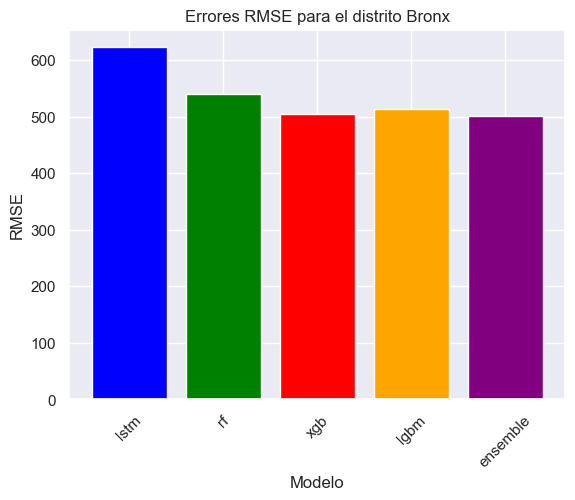

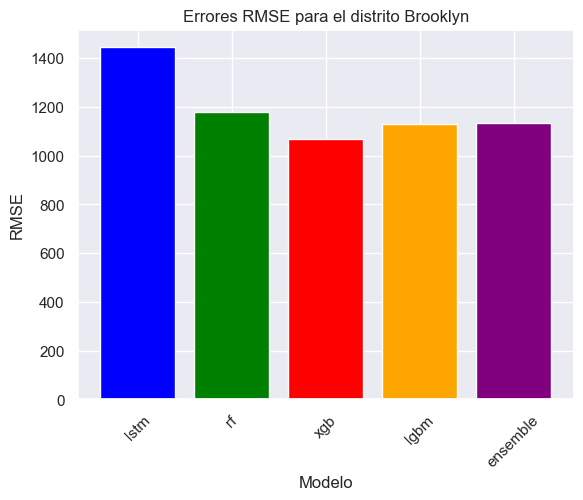

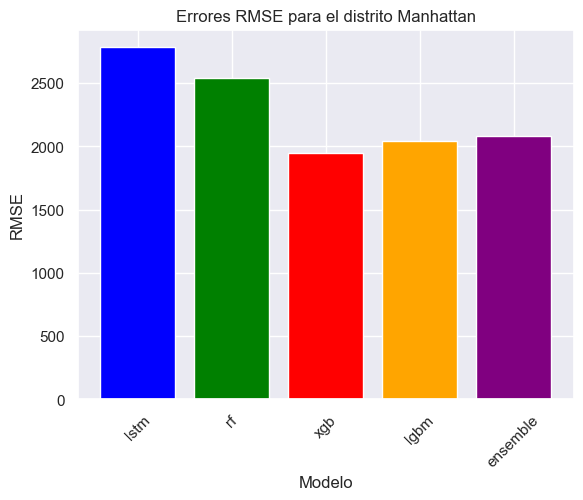

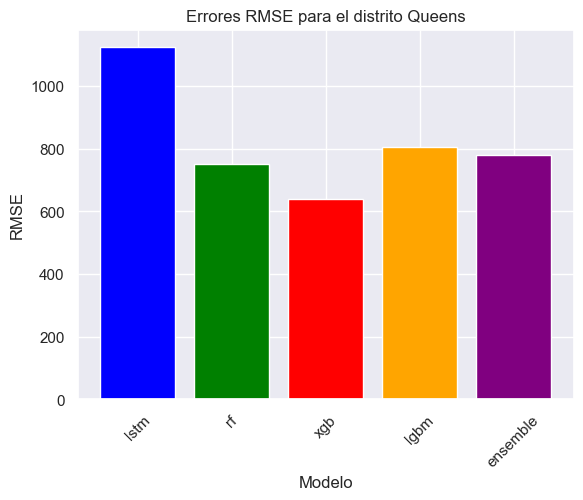

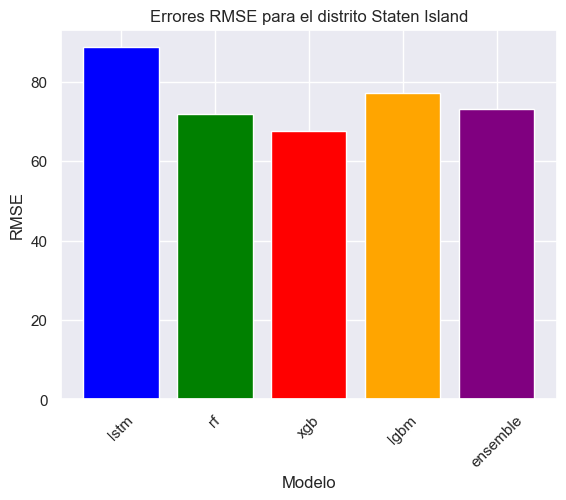

In [53]:
for distrito in distritos:
    # Obtener los errores RMSE para el distrito
    errores_distrito = [errores[distrito][modelo]['RMSE'] for modelo in modelos]

    # Crear la figura y el eje
    fig, ax = plt.subplots()

    # Crear las barras
    ax.bar(modelos, errores_distrito, color=['blue', 'green', 'red', 'orange', 'purple'])

    # Agregar etiquetas y título
    ax.set_xlabel('Modelo')
    ax.set_ylabel('RMSE')
    ax.set_title(f'Errores RMSE para el distrito {distrito}')
    
    # Rotar las etiquetas del eje x para mejor visualización
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

En todos los casos, el ensemble está superando o al menos igualando la precisión de los modelos individuales, lo que sugiere que la combinación de modelos está aportando beneficios significativos. El modelo individual que mejor performance tiene es XGBoost, pero el modelo de ensemble no tiene gran diferencia en error.

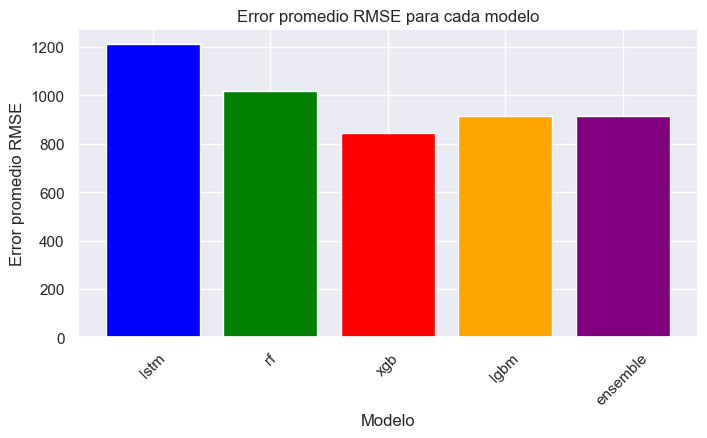

In [74]:
promedio_errores = {modelo: np.mean([errores[distrito][modelo]['RMSE'] for distrito in errores]) for modelo in modelos}

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(modelos, promedio_errores.values(), color=['blue', 'green', 'red', 'orange', 'purple'])

# Agregar etiquetas y título
plt.xlabel('Modelo')
plt.ylabel('Error promedio RMSE')
plt.title('Error promedio RMSE para cada modelo')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

Probemos con otra ponderación:

In [55]:
predicciones_exp = predecir(ensemble=ensemble_completo['ensemble'], test=True, test_data=X_test_data, ponderacion='exp', alpha=0.5)

Errores RMSE de los modelos individuales y del ensemble: 
------------------------------------------
DISTRITO:  BRONX
lstm :  622.3040924777824
rf :  540.1440155432526
xgb :  505.4460378667457
lgbm :  512.6329623548708
ensemble :  499.79982484118227
------------------------------
DISTRITO:  BROOKLYN
lstm :  1444.1848095611392
rf :  1180.3849138879118
xgb :  1066.813499600909
lgbm :  1131.5133341240462
ensemble :  1180.3849138879118
------------------------------
DISTRITO:  MANHATTAN
lstm :  2782.7733034073835
rf :  2544.6119008241085
xgb :  1951.0311368227176
lgbm :  2045.8555296773502
ensemble :  2544.6119008241085
------------------------------
DISTRITO:  QUEENS
lstm :  1123.5181835457186
rf :  750.9270389719545
xgb :  639.8362327140912
lgbm :  807.2403681807587
ensemble :  639.8373107294449
------------------------------
DISTRITO:  STATEN ISLAND
lstm :  88.66787460101975
rf :  71.97430454800423
xgb :  67.71462306951913
lgbm :  77.27015698733351
ensemble :  70.48412601860616
--------

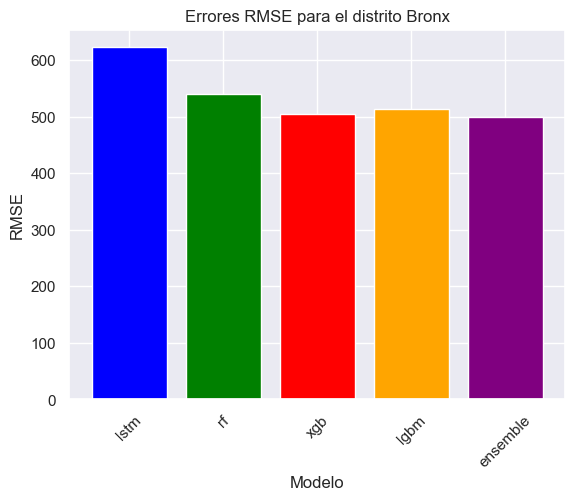

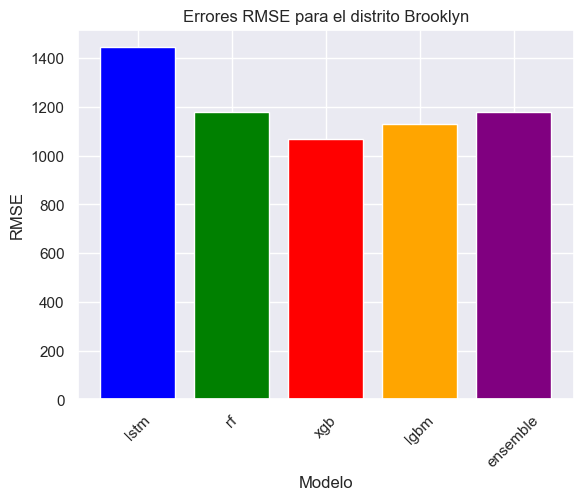

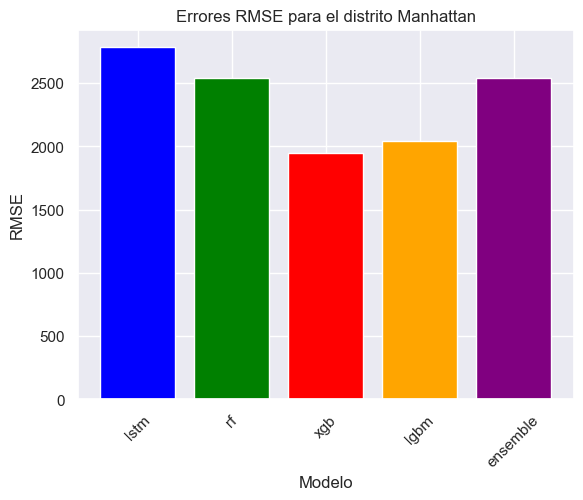

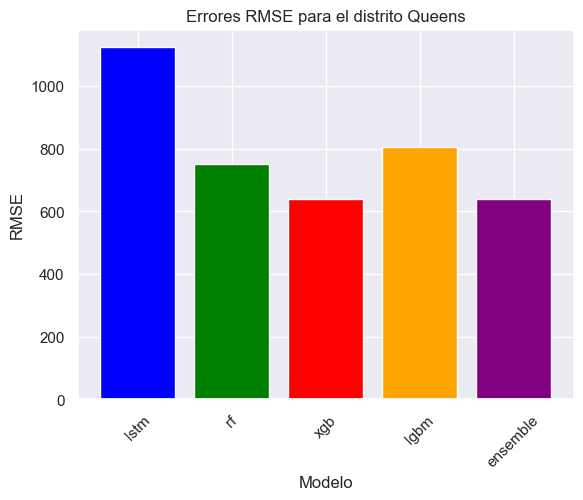

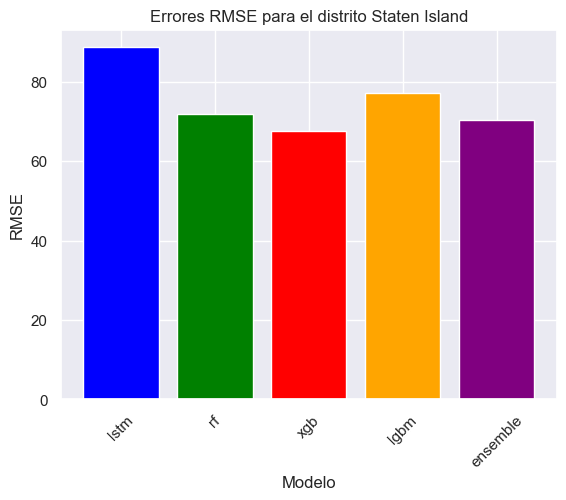

In [56]:
resultados_exp = {}
for district in distritos:
    resultados_exp[district] = pd.concat([predicciones_exp[district], test_data[district]], axis=1).dropna().rename(columns={district: 'real_values'})

errores_exp = {}
modelos = ['lstm','rf','xgb','lgbm','ensemble']
for district in distritos:
    errores_exp[district] = {}
    for model in modelos:
        mse = mean_squared_error(resultados_exp[district]['real_values'], resultados_exp[district][model])
        rmse = np.sqrt(mse)
        errores_exp[district][model] = {'MSE': mse, 'RMSE': rmse}

print('Errores RMSE de los modelos individuales y del ensemble: ')
print('------------------------------------------')
for district in distritos:
    print('DISTRITO: ', district.upper())
    for model in modelos:
        print(model, ': ', errores_exp[district][model]['RMSE'])
    print('------------------------------')

for distrito in distritos:
    # Obtener los errores RMSE para el distrito
    errores_distrito = [errores_exp[distrito][modelo]['RMSE'] for modelo in modelos]

    # Crear la figura y el eje
    fig, ax = plt.subplots()

    # Crear las barras
    ax.bar(modelos, errores_distrito, color=['blue', 'green', 'red', 'orange', 'purple'])

    # Agregar etiquetas y título
    ax.set_xlabel('Modelo')
    ax.set_ylabel('RMSE')
    ax.set_title(f'Errores RMSE para el distrito {distrito}')
    
    # Rotar las etiquetas del eje x para mejor visualización
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

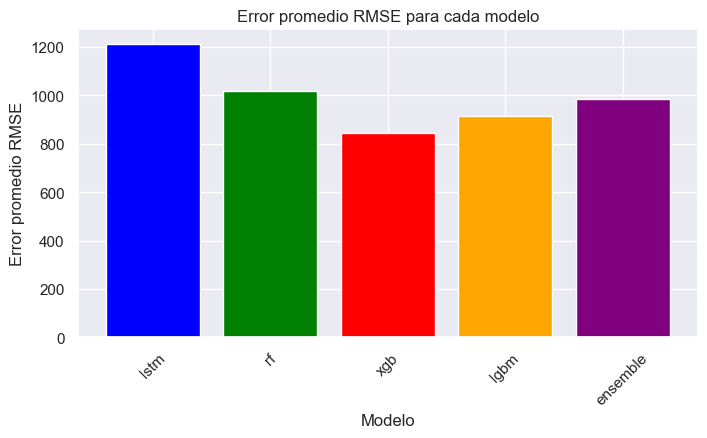

In [73]:
promedio_errores_exp = {modelo: np.mean([errores_exp[distrito][modelo]['RMSE'] for distrito in errores_exp]) for modelo in modelos}

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(modelos, promedio_errores_exp.values(), color=['blue', 'green', 'red', 'orange', 'purple'])

# Agregar etiquetas y título
plt.xlabel('Modelo')
plt.ylabel('Error promedio RMSE')
plt.title('Error promedio RMSE para cada modelo')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()

Vemos que la selección de la ponderación lineal es correcta, ya que en la exponencial con alpha = 0.5 es bastante mejor el modelo individual xgb.

Grafiquemos las predicciones, en el caso de la ponderación lineal:

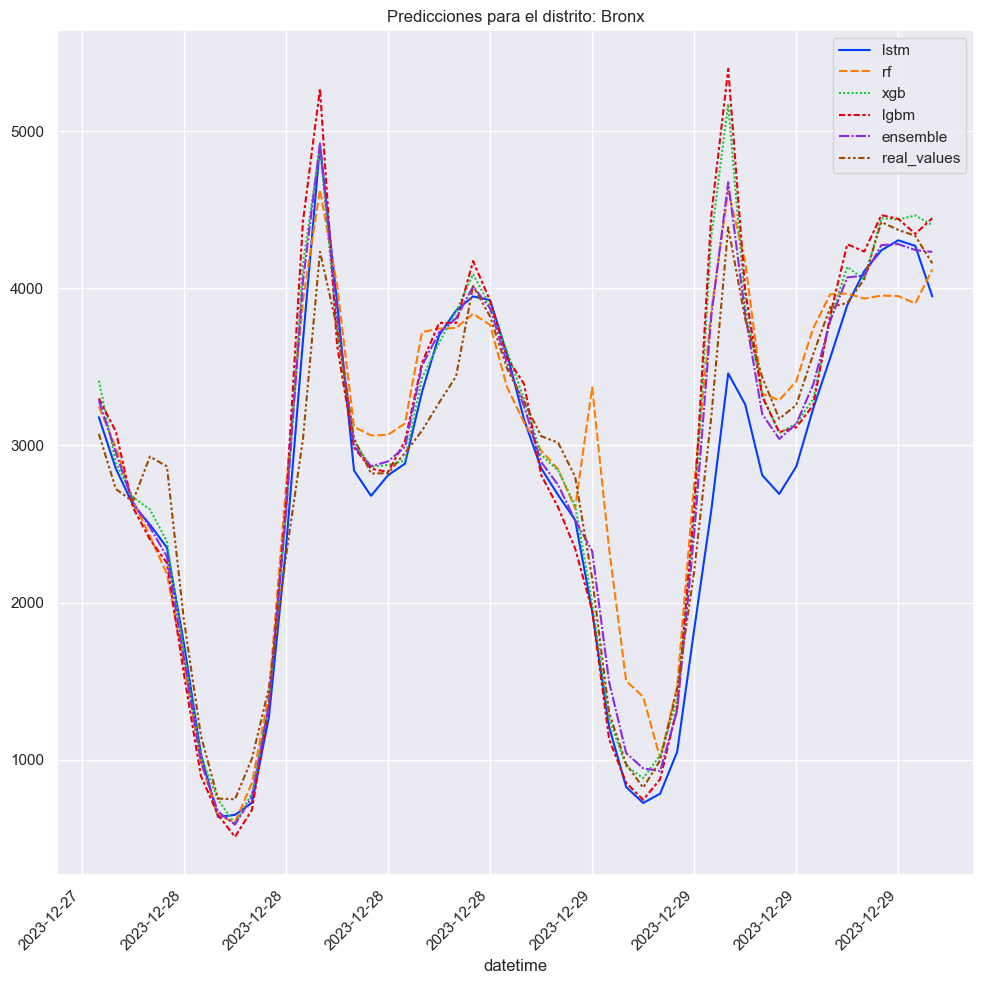

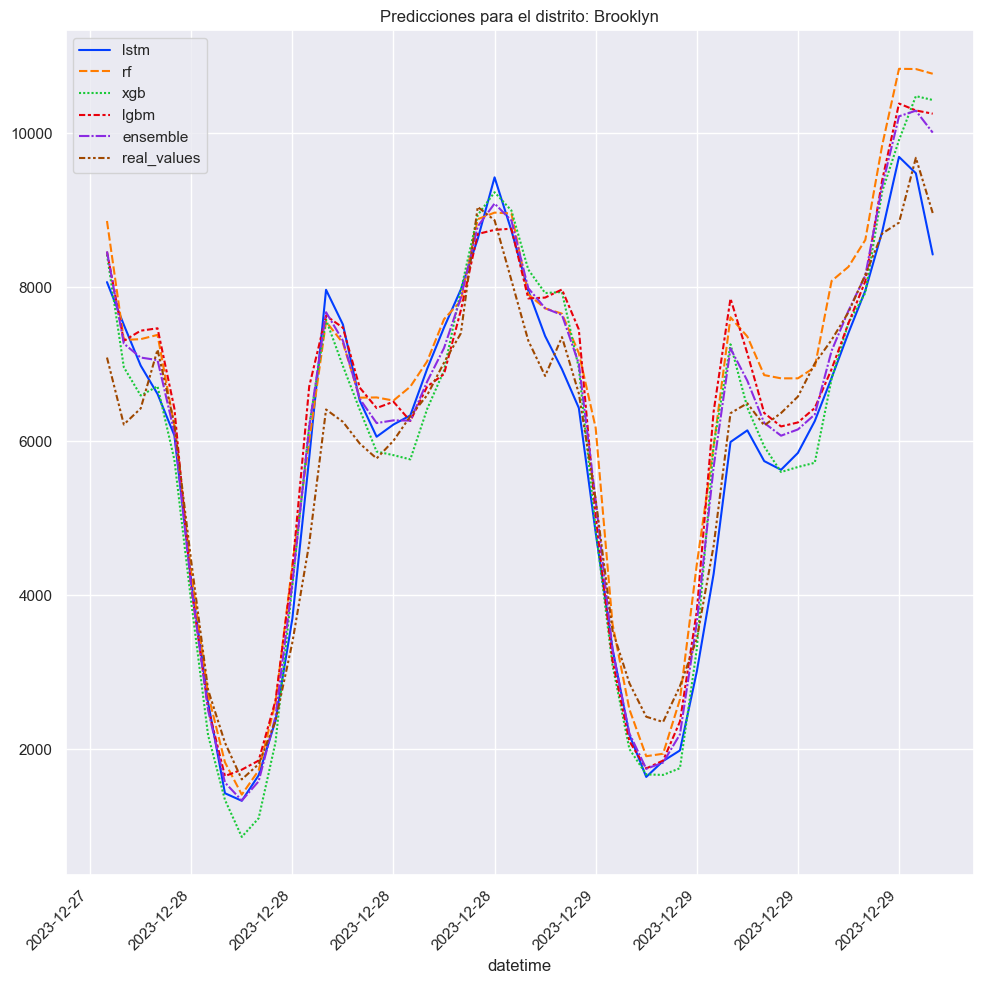

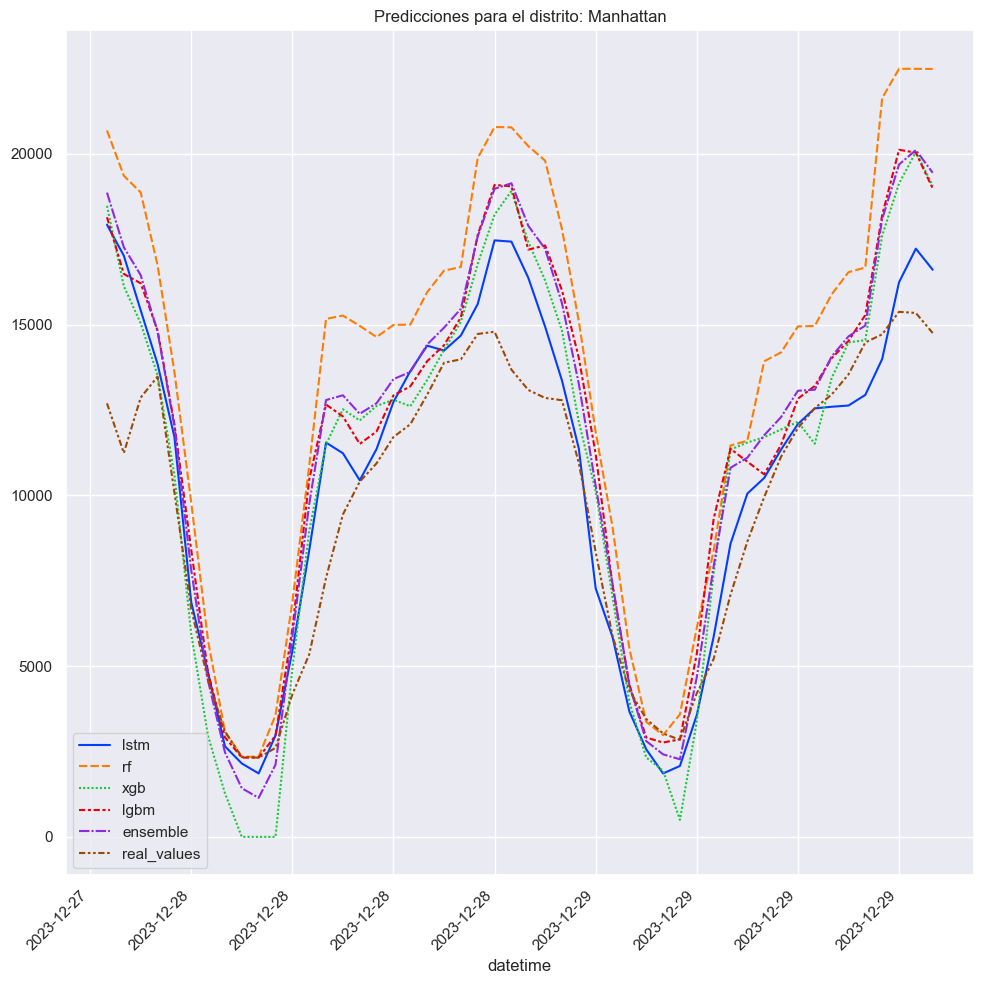

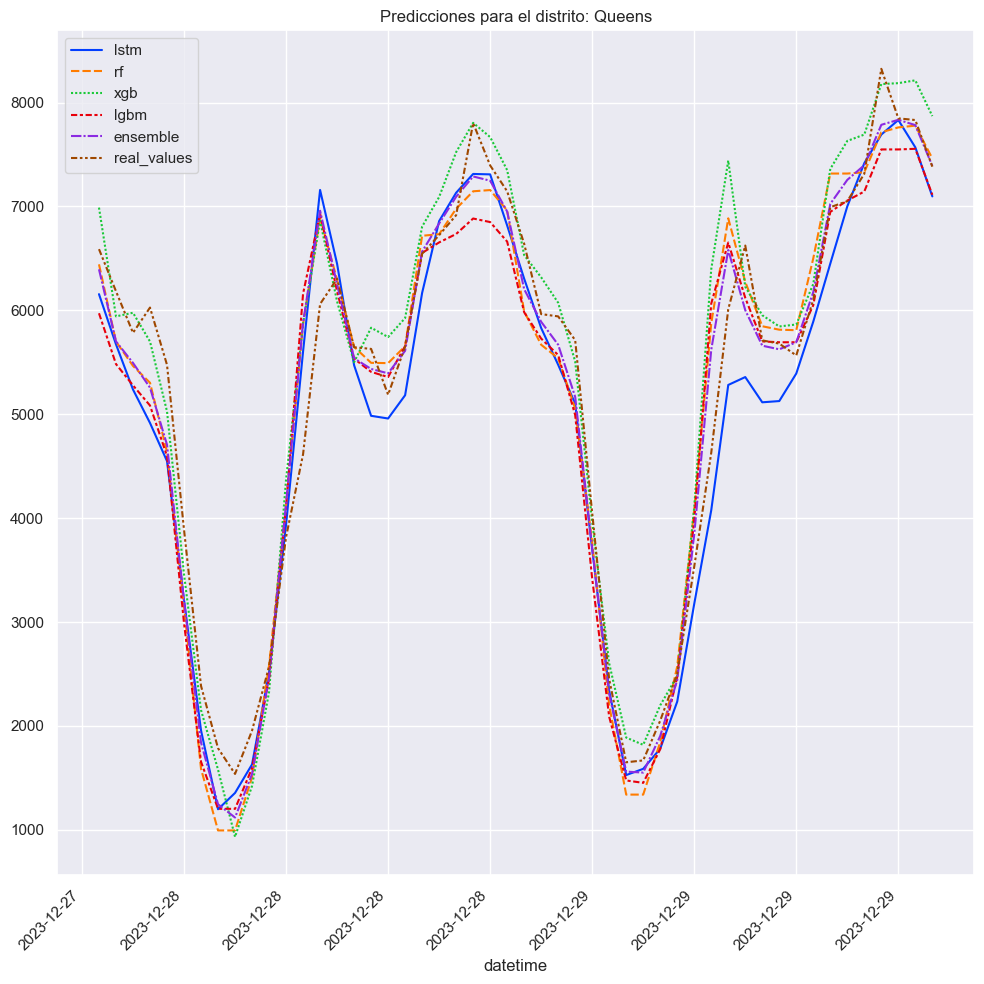

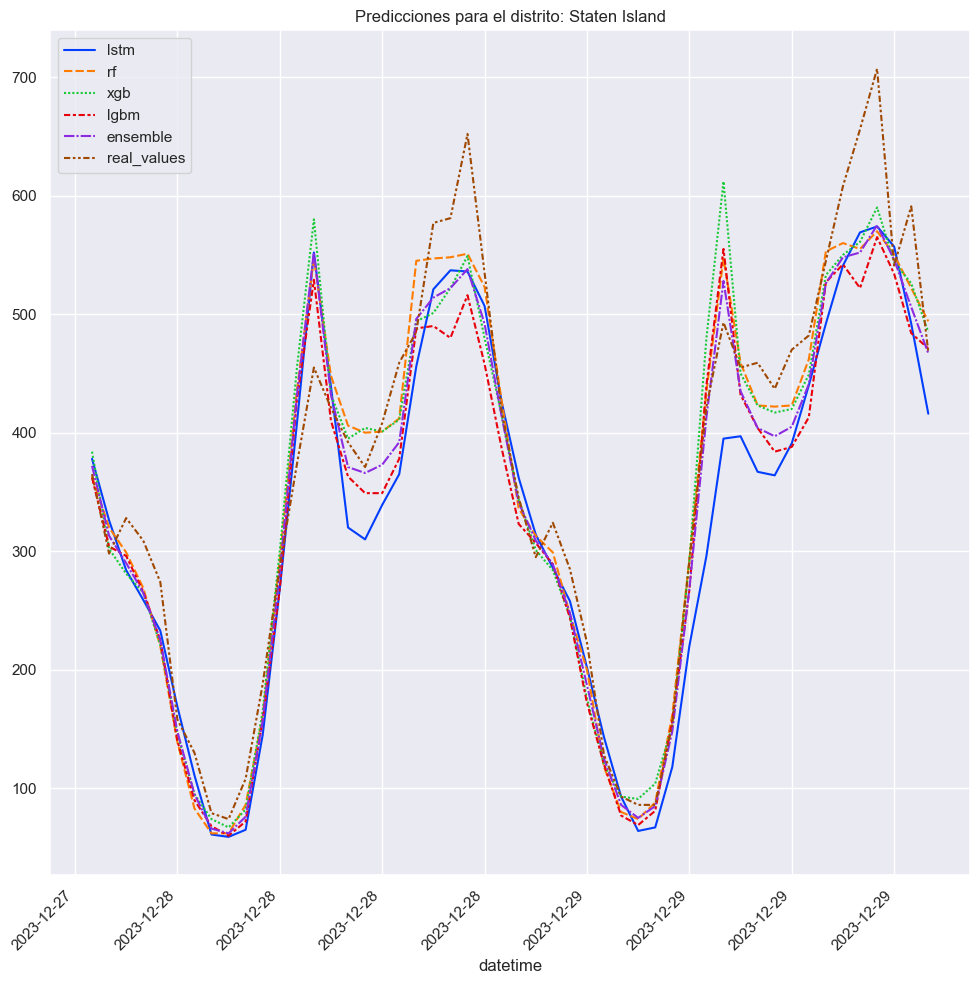

In [72]:
for distrito in distritos:
    plt.figure(figsize=(10,10))
    sns.set_theme(style='darkgrid', palette='bright')
    sns.lineplot(resultados[distrito].iloc[-100:-50,:])
    plt.title(f'Predicciones para el distrito: {distrito}')
    plt.xticks(rotation=45, ha='right')  # Rotar 45 grados y alinear a la derecha
    
    # Configurar formato de las fechas
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Formato año-mes-día y hora:minuto
    
    # Mostrar la gráfica
    plt.tight_layout()  # Ajustar el diseño de la gráfica
    plt.show()

Veamos ahora las contribuciones de cada variable en el caso de los modelos RF, XGB y LGBM:

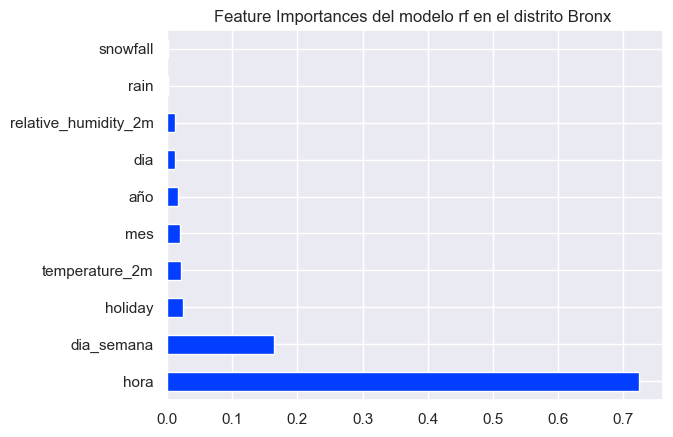

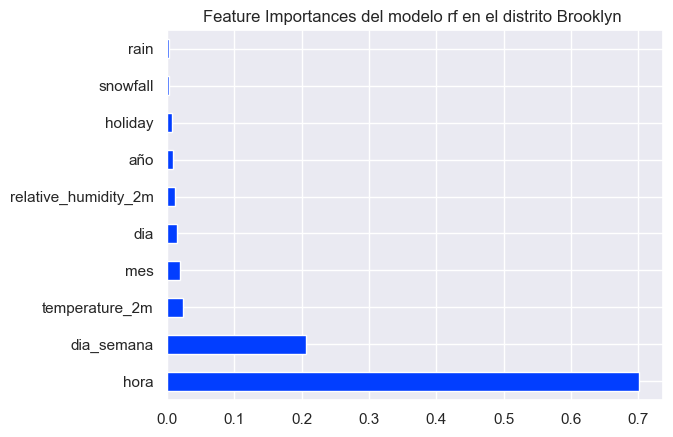

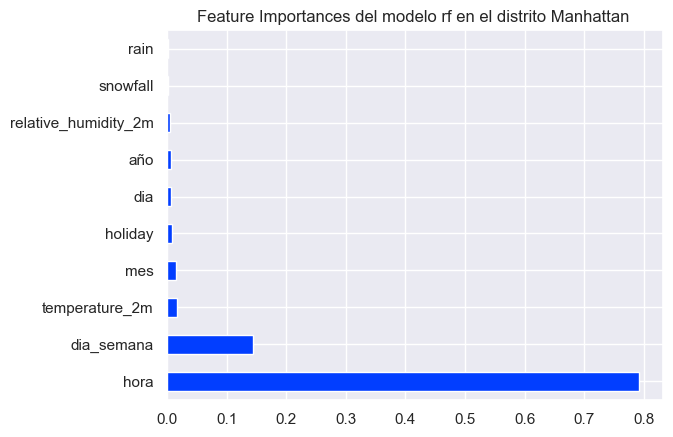

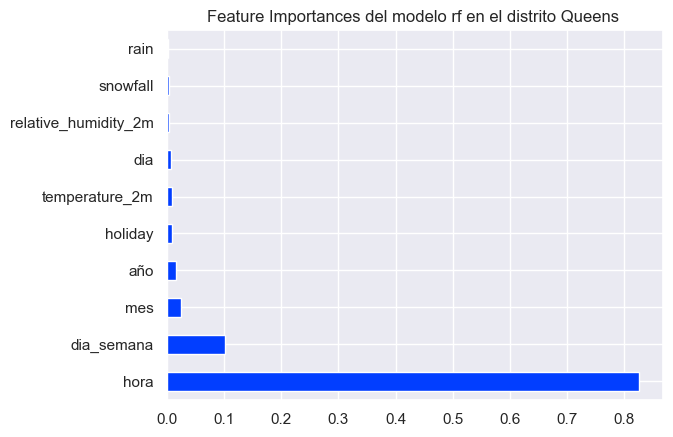

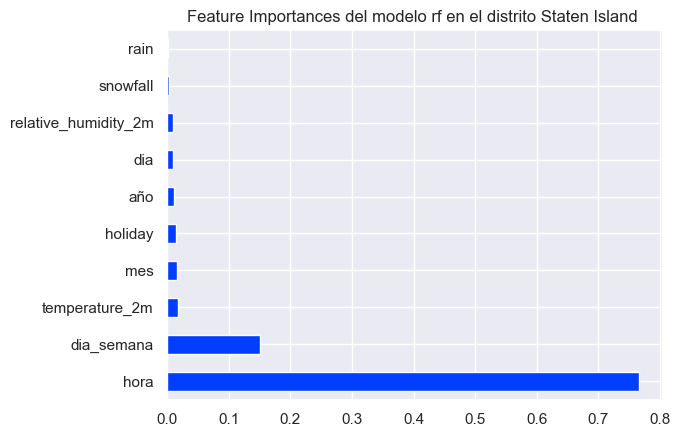

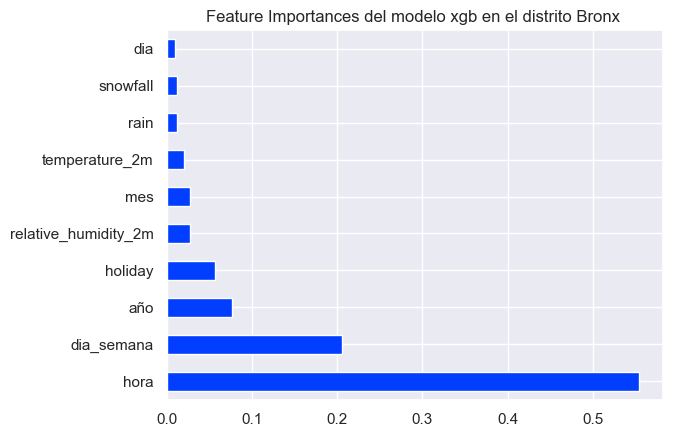

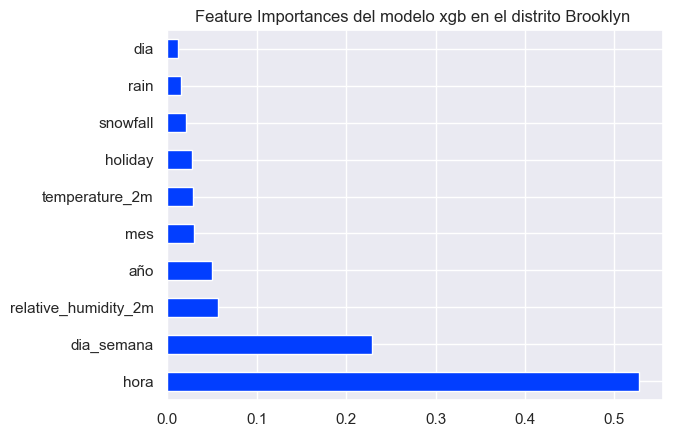

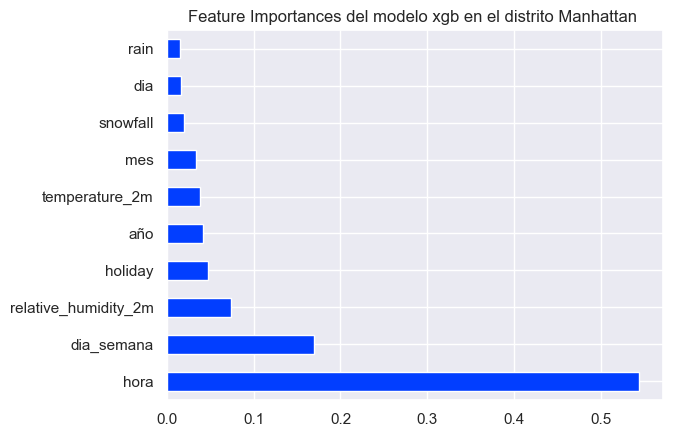

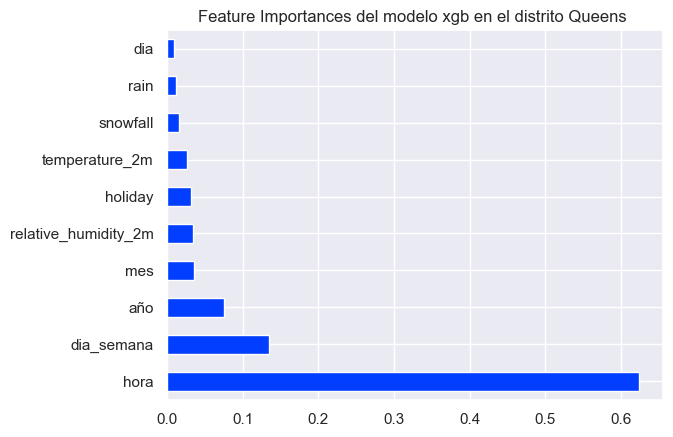

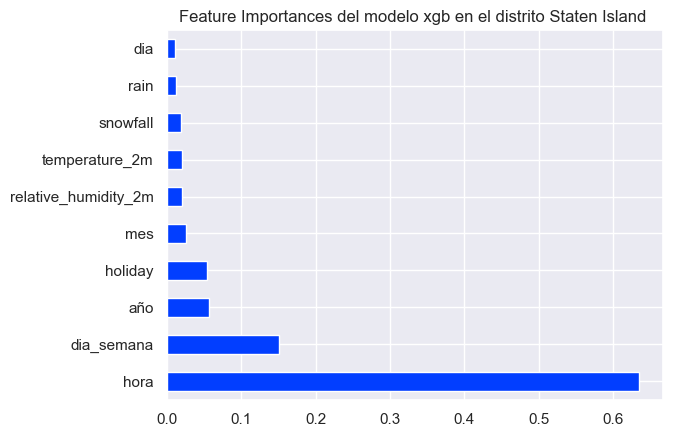

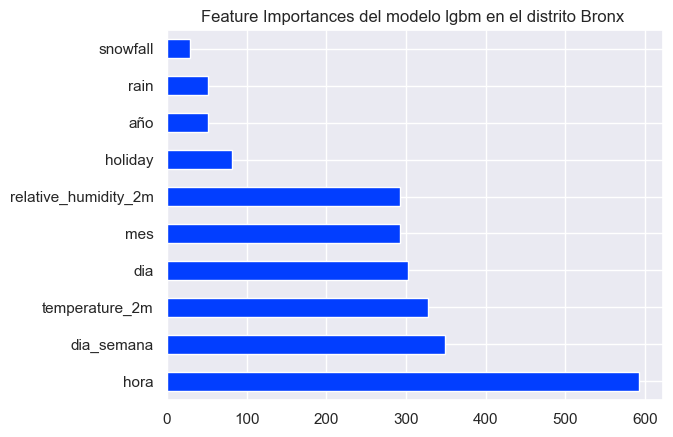

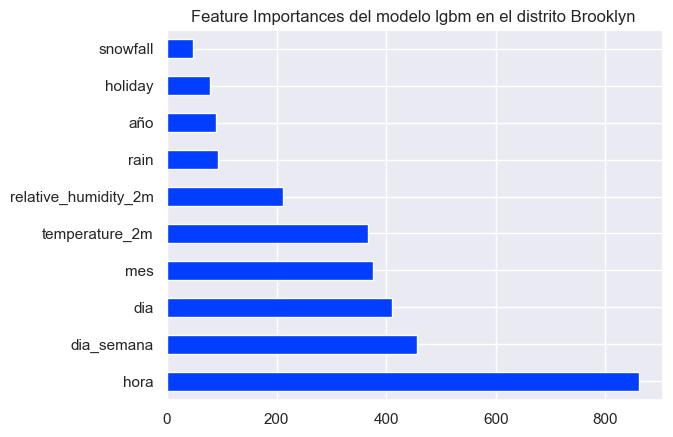

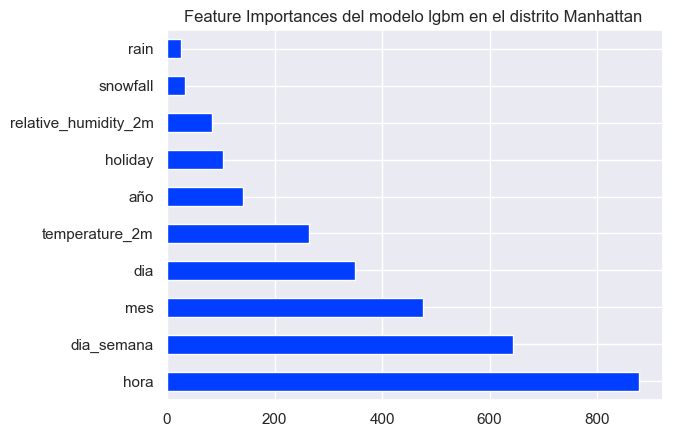

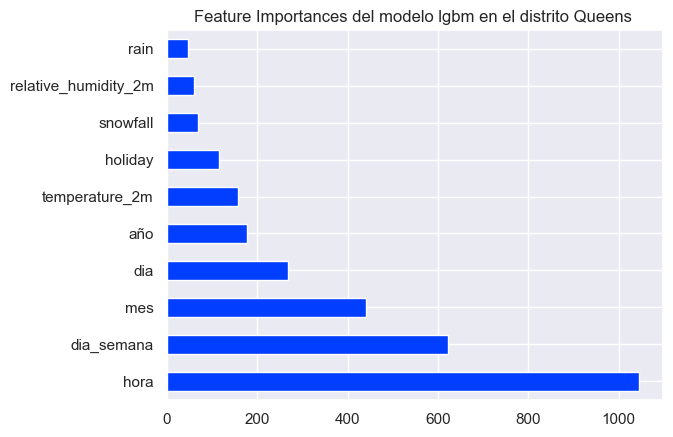

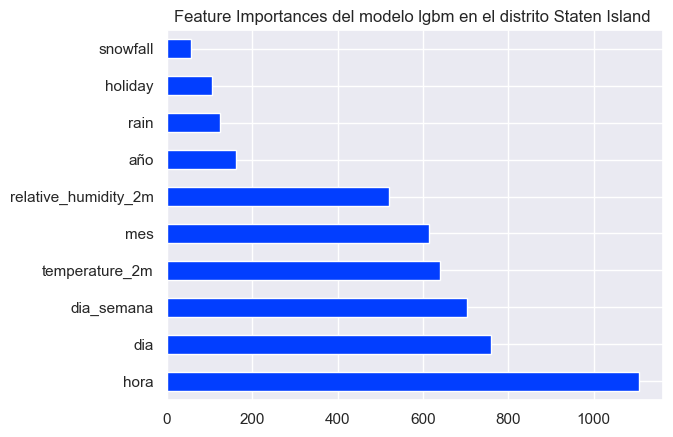

In [77]:
graficar_feature_importances(ensemble_completo['ensemble'])

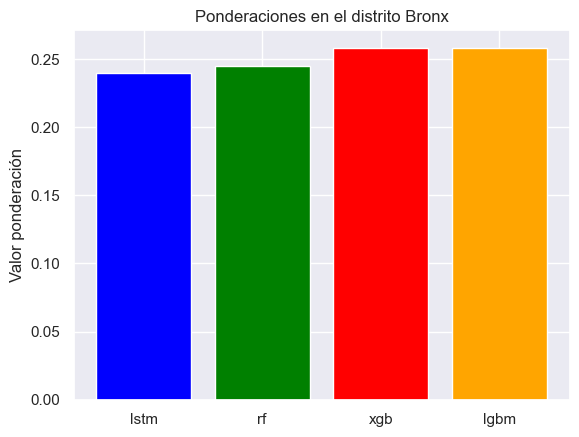

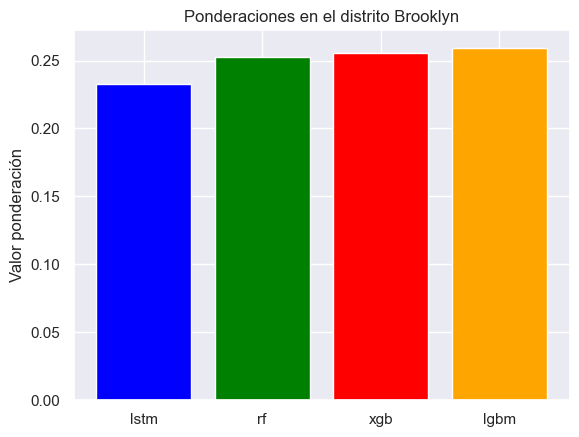

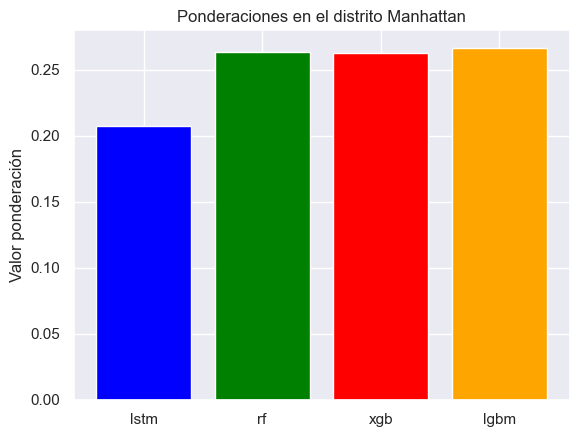

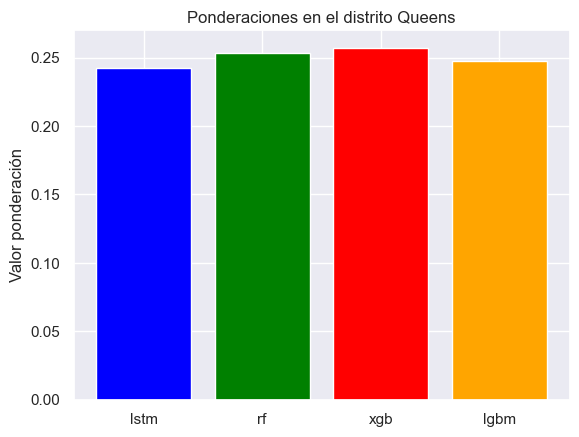

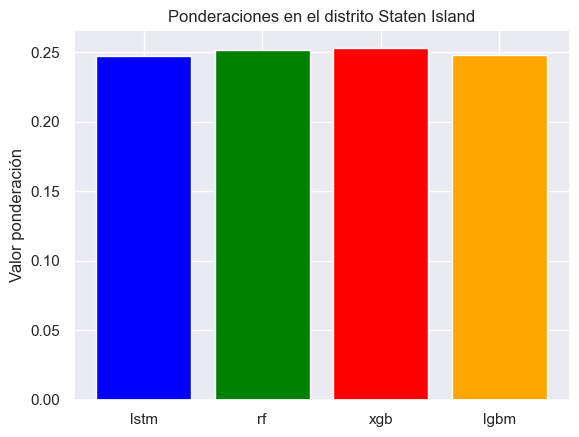

In [88]:
modelos =['lstm', 'rf', 'xgb', 'lgbm']
for distrito in distritos:
    plt.bar(modelos, ensemble_completo['ensemble']['ponderaciones'][distrito]['lineal'].values(), color=['blue', 'green', 'red', 'orange'])
    plt.title(f'Ponderaciones en el distrito {distrito}')
    plt.ylabel('Valor ponderación')
    plt.show()